In [1]:
using Plots, DelimitedFiles
using Random, Distributions, StatsBase, LinearAlgebra
Random.seed!()

TaskLocalRNG()

In [52]:
N = 1000
K = 5

5

In [4]:
io = open("../data/preliminary_results/multi_region/Sigma_$(N)_$(K).txt","r")
Σ = readdlm(io,Float64)
close(io)

io = open("../data/preliminary_results/multi_region/Gamma_$(N)_$(K).txt","r")
Γ = readdlm(io,Float64)
close(io)

io = open("../data/preliminary_results/multi_region/B_$(N)_$(K).txt","r")
B = readdlm(io,Float64)
close(io)

In [6]:
io = open("../data/preliminary_results/multi_region/elbows_$(N)_$(K)_1000_11000_10k.txt","r")
elbows1 = readdlm(io,Float64)
close(io)

io = open("../data/preliminary_results/multi_region/elbows_$(N)_$(K)_95000_105000_10k.txt","r")
elbows2 = readdlm(io,Float64)
close(io)

io = open("../data/preliminary_results/multi_region/lambda_$(N)_$(K)_1000_11000_10k.txt","r")
lambda1 = readdlm(io,Float64)
close(io)

io = open("../data/preliminary_results/multi_region/lambda_$(N)_$(K)_95000_105000_10k.txt","r")
lambda2 = readdlm(io,Float64)
close(io)

io = open("../data/preliminary_results/multi_region/nu_$(N)_$(K)_1000_11000_10k.txt","r")
nu1 = readdlm(io,Float64)
close(io)

io = open("../data/preliminary_results/multi_region/nu_$(N)_$(K)_95000_105000_10k.txt","r")
nu2 = readdlm(io,Float64)
close(io)

In [11]:
io = open("../data/input/X_1000_11000_10k.txt","r")
X1 = readdlm(io, Float64; header=true)[1]
close(io)
X1 = X1[:,1:N]
io = open("../data/input/X_95000_105000_10k.txt","r")
X2 = readdlm(io, Float64; header=true)[1]
close(io)
X2 = X2[:,1:N];

In [10]:
io = open("../data/input/Y_bin_1000_11000_10k.txt","r")
Y1 = readdlm(io, Float64)
close(io)
Y1 = Y1[1:N,1:N]
io = open("../data/input/Y_bin_95000_105000_10k.txt","r")
Y2 = readdlm(io, Float64)
close(io)
Y2 = Y2[1:N,1:N];

In [50]:
lambda1

10×2000 Matrix{Float64}:
  -4.19289     4.63068   -4.72541  …   -7.90829   -4.39086    -2.08281
   0.420319   10.9931     1.87164      -2.81661   -4.7686     -3.34803
 -15.8866      4.16996   -5.16467     -24.5627     5.97999    11.0875
   3.06867    11.4684     2.61055      -0.92651   -4.04376    -0.925574
  -5.50741   -14.204     -2.91374       7.29953    7.17077     7.29608
 -10.3472     -1.19143   -1.19308  …   -6.48267   -0.500227   -2.7597
   7.62772    11.2599     7.45515     -10.2103     0.0388275   4.51507
   6.4727      7.1109     2.24862      -6.13295    1.93045     0.822655
   1.16628     4.49366    1.01155      -0.546702   6.24618     6.91076
   2.61211    -0.889717  -2.49422     -15.5612     1.16936    -2.03947

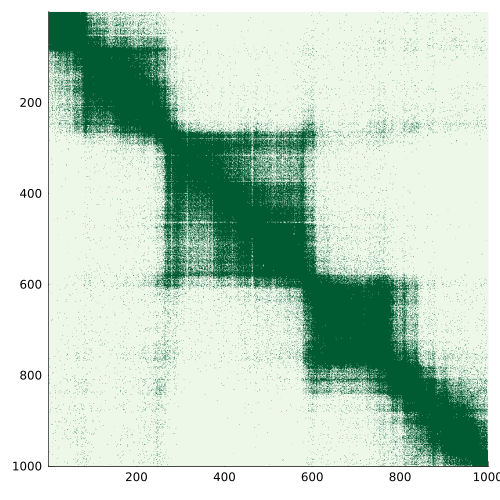

In [12]:
heatmap(Y1, yflip=true,c = :Greens_7,cbar=false, size=(500,500))

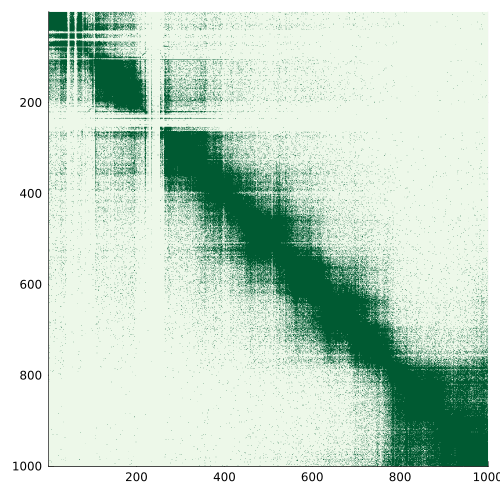

In [13]:
heatmap(Y2, yflip=true,c = :Greens_7,cbar=false, size=(500,500))

In [16]:
n_iter = div(length(B[:,1]),K)

2

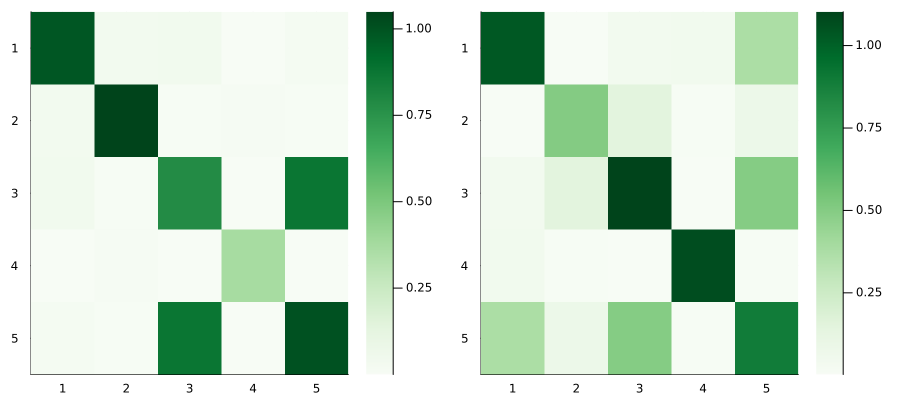

In [26]:
hms = []
for i in 1:n_iter
    push!(hms, heatmap(B[(i-1)*K+1:i*K,:], yflip=true,c = :Greens,size = (900,400),dpi=600,cbar=true))
end
plot(hms..., layout = (1,2))

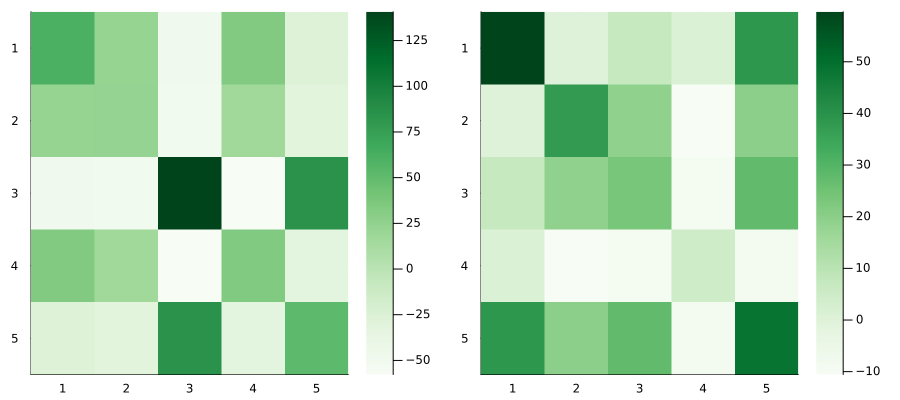

In [25]:
hms = []
for i in 1:n_iter
    push!(hms, heatmap(Σ[(i-1)*K+1:i*K,:], yflip=true,c = :Greens,size = (900,400),dpi=600,cbar=true))
end
plot(hms..., layout = (1,2))

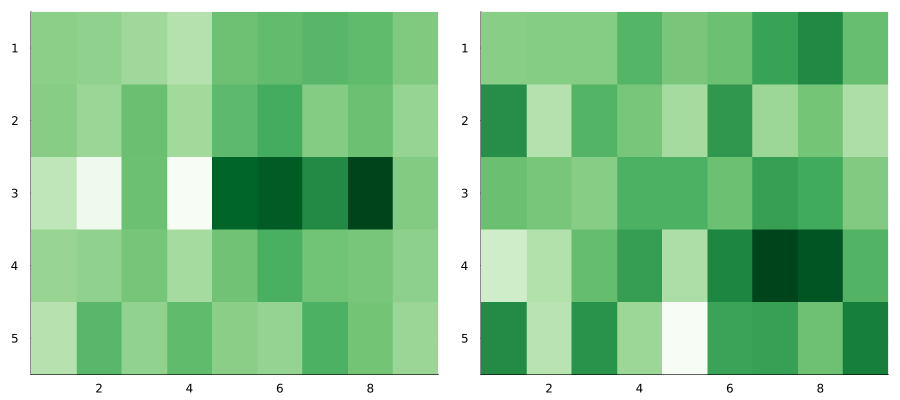

In [27]:
hms = []
for i in 1:n_iter
    push!(hms, heatmap(Γ[(i-1)*K+1:i*K,:], yflip=true,c = :Greens,size = (900,400),dpi=600,cbar=false))
end
plot(hms..., layout = (1,2))

In [56]:
thetas1 = zeros(K*n_iter,N)
thetas2 = zeros(K*n_iter,N)
for n in 1:n_iter
    for i in 1:N
        thetas1[(n-1)*K+1:n*K,i] .= exp.(lambda1[(n-1)*K+1:n*K,i]) ./ sum(exp.(lambda1[(n-1)*K+1:n*K,i]))
        thetas2[(n-1)*K+1:n*K,i] .= exp.(lambda1[(n-1)*K+1:n*K,i+N]) ./ sum(exp.(lambda1[(n-1)*K+1:n*K,i+N]))
    end
end

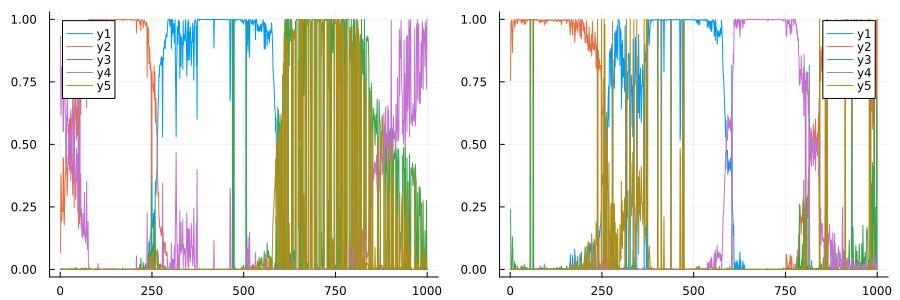

In [62]:
hms = []
for n in 1:n_iter
    push!(hms, plot(thetas1[(n-1)*K+1:n*K,:]',size = (900,300),dpi=600))
end
plot(hms..., layout = (1,2))

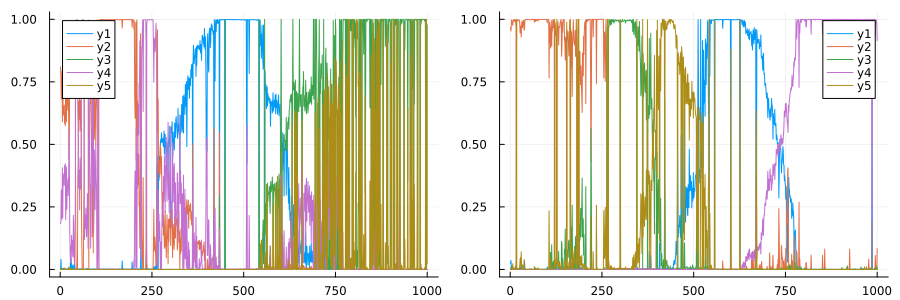

In [65]:
hms = []
for n in 1:n_iter
    push!(hms, plot(thetas2[(n-1)*K+1:n*K,:]',size = (900,300),dpi=600))
end
plot(hms..., layout = (1,2))

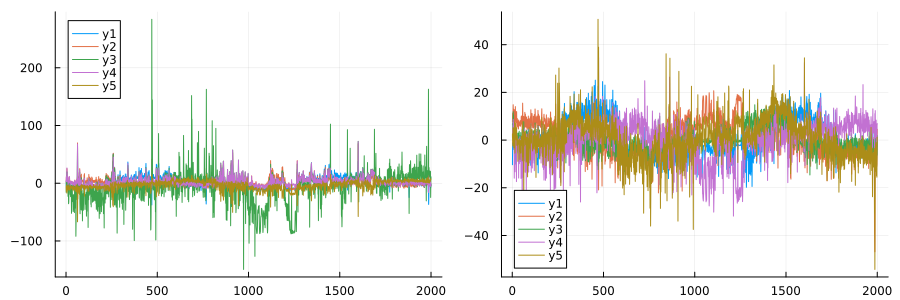

In [66]:
hms = []
for n in 1:n_iter
    push!(hms, plot(lambda1[(n-1)*K+1:n*K,:]',size = (900,300),dpi=600))
end
plot(hms..., layout = (1,2))

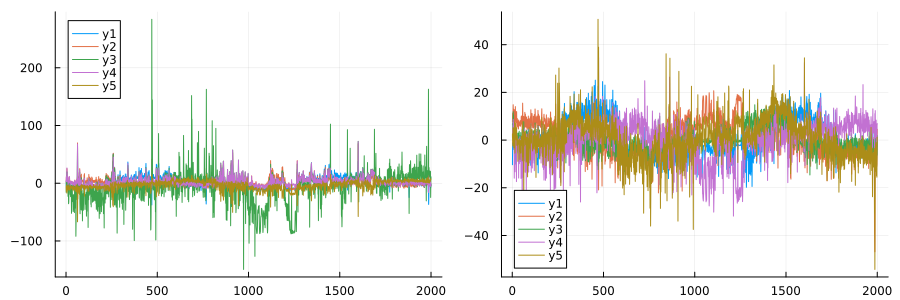

In [70]:
hms = []
for n in 1:n_iter
    push!(hms, plot(lambda2[(n-1)*K+1:n*K,:]',size = (900,300),dpi=600))
end
plot(hms..., layout = (1,2))

In [71]:
ρ = 0.1
A_pred1 = zeros(N,N*n_iter)
for n in 1:n_iter
    for i in 1:N
        for j in 1:i-1
            z_i = sample(Weights(thetas1[(n-1)*K+1:n*K,i]))
            z_j = sample(Weights(thetas1[(n-1)*K+1:n*K,j]))

            rate = B[2*n-1+z_i,z_j] *(1-ρ) #*exp(-abs(i-j)/(N))
            if rand() < rate
                A_pred1[i,j+N*(n-1)] = 1
                A_pred1[j,i+N*(n-1)] = A_pred1[i,j+N*(n-1)]
            end
        end
    end
end

In [72]:
ρ = 0.1
A_pred2 = zeros(N,N*n_iter)
for n in 1:n_iter
    for i in 1:N
        for j in 1:i-1
            z_i = sample(Weights(thetas2[(n-1)*K+1:n*K,i]))
            z_j = sample(Weights(thetas2[(n-1)*K+1:n*K,j]))

            rate = B[2*n-2+z_i,z_j] *(1-ρ) #*exp(-abs(i-j)/(N))
            if rand() < rate
                A_pred2[i,j+N*(n-1)] = 1
                A_pred2[j,i+N*(n-1)] = A_pred2[i,j+N*(n-1)]
            end
        end
    end
end

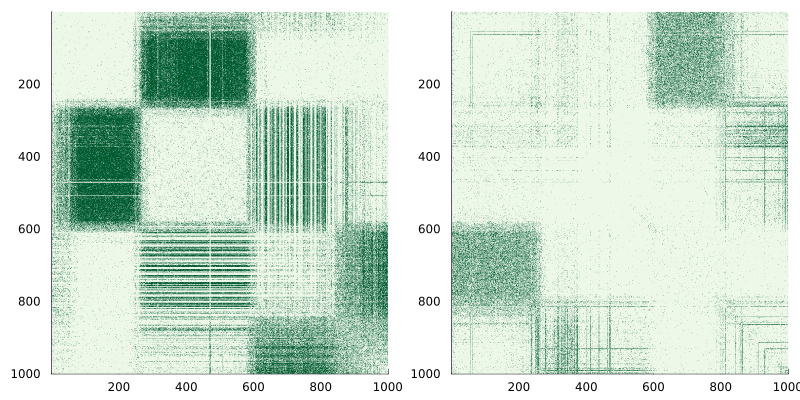

In [74]:
hms = []
for i in 1:n_iter
    push!(hms, heatmap(A_pred1[:,(i-1)*N+1:i*N], yflip=true,c = :Greens_7,size = (800,400),dpi=600,cbar=false))
end
plot(hms..., layout = (1,2))

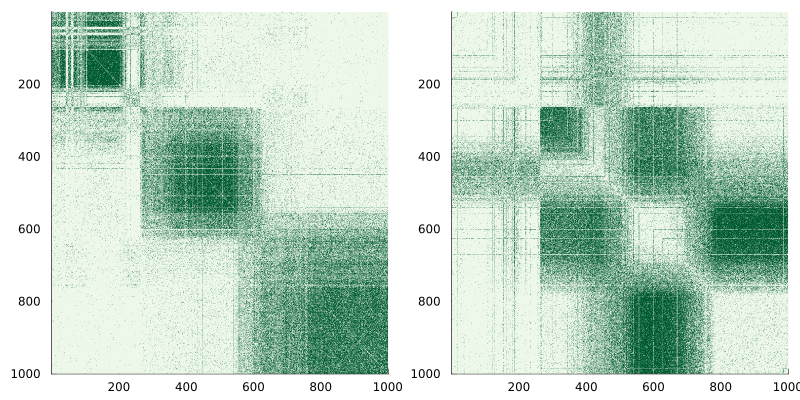

In [78]:
hms = []
for i in 1:n_iter
    push!(hms, heatmap(A_pred2[:,(i-1)*N+1:i*N], yflip=true,c = :Greens_7,size = (800,400),dpi=600,cbar=false))
end
plot(hms..., layout = (1,2))

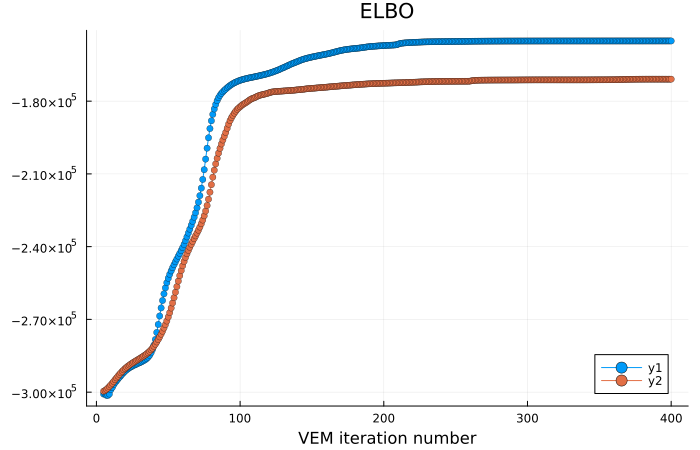

In [44]:
start = 5
finish = length(elbows1[1,:])
index = [i for i in start:finish]
plot(index,elbows1[:,start:finish]',title="ELBO",xlabel="VEM iteration number", size = (700,450),marker =:circle, ms=3.5, msw=.3,legend=:bottomright)

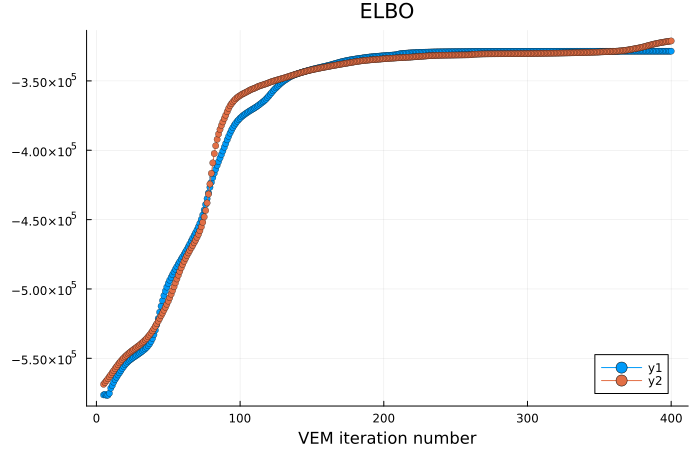

In [46]:
start = 5
finish = length(elbows2[1,:])
index = [i for i in start:finish]
plot(index,elbows2[:,start:finish]' .+ elbows1[:,start:finish]' ,title="ELBO",xlabel="VEM iteration number", size = (700,450),marker =:circle, ms=3.5, msw=.3,legend=:bottomright)

In [82]:
μ1 = Γ[6:10,:]*X1
μ2 = Γ[6:10,:]*X2

5×1000 Matrix{Float64}:
 -1.58027    -3.17276    -4.13314  …  -2.1663   2.15637    2.60107
  2.70342     3.62546     2.01523     -4.66134  0.328771  -2.16337
 -0.288061   -0.587458    1.10512     -1.1148   1.65305    1.41729
 -4.79027   -14.0218    -13.6011      -2.60849  6.40973    7.92516
  0.571001   -3.64645    -8.61235     -8.31822  2.3344     1.35023

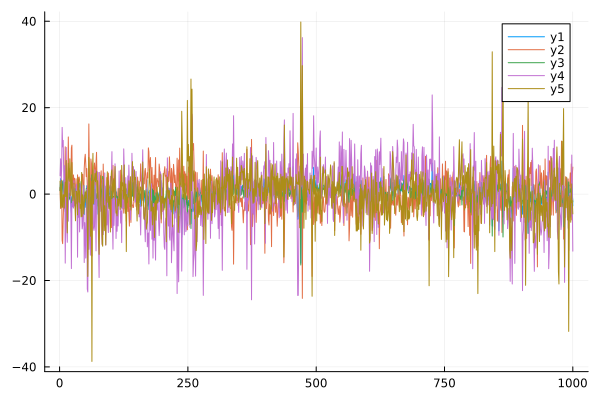

In [83]:
plot(μ1')

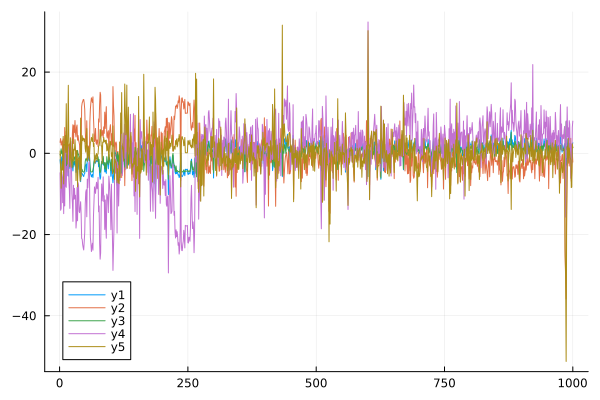

In [84]:
plot(μ2')